# Topic models with Gensim

Gensim is a popular library for topic modeling. Here we'll see how it stacks up to scikit-learn.

<p class="reading-options">
  <a class="btn" href="/text-analysis/topic-models-with-gensim">
    <i class="fa fa-sm fa-book"></i>
    Read online
  </a>
  <a class="btn" href="/text-analysis/notebooks/Topic models with Gensim.ipynb">
    <i class="fa fa-sm fa-download"></i>
    Download notebook
  </a>
  <a class="btn" href="https://colab.research.google.com/github/littlecolumns/ds4j-notebooks/blob/master/text-analysis/notebooks/Topic models with Gensim.ipynb" target="_new">
    <i class="fa fa-sm fa-laptop"></i>
    Interactive version
  </a>
</p>

### Prep work: Downloading necessary files

## Original Notebook Text:

Before we get started, we need to download all of the data we'll be using.
* **recipes.csv:** recipes - a list of recipes (but only with ingredient names)
* **state-of-the-union.csv:** State of the Union addresses - each presidential address from 1970 to 2012

## MMATCH Guide
 We stored all of our corpora in a Google drive folder. These lines here open that Google drive folder and navigate to the correct corpus.


In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import os
from pathlib import Path

data = []
docs = []
# Set Corpus Name to the folder name with the corpora to analyze; files output by GenSim will also use this name, in order to clearly ID the corpus that generated the analysis
thiscorpus = "AllSpanish"
# Set a path name on the local computer to save the output files
thisdir = os.path.join("/content", "drive","My Drive","Spies of History", thiscorpus)
savedir = os.path.join("/content", "drive","My Drive","Spies of History","Output", thiscorpus)

for r, d, f in os.walk(thisdir):
    for file in f:
        if ".txt" in file:
            data.append(Path(file).stem)
# change UTF-8 to latin1 in the "encoding" below
            with open(thisdir+"/"+file, "r", encoding = 'UTF-8') as filecontents:
              docs.append(" ".join(line.strip() for line in filecontents))

print(len(data))
print(data)
print(len(docs))



487
['Boza_18960421', 'Boza_18960423', 'Boza_18960619', 'Boza_18960620', 'Boza_18960531', 'Boza_18960604', 'Boza_18960501', 'Boza_18960603', 'Boza_18960418', 'Boza_18960527', 'Boza_18960506', 'Boza_18960601', 'Boza_18961228', 'Boza_18960605', 'Boza_18960518', 'Boza_18960608', 'Boza_18960624', 'Boza_18960508', 'Boza_18960502', 'Boza_18960529', 'Boza_18960414', 'Boza_18960628', 'Boza_18960514', 'Boza_18960610', 'Boza_18960606', 'Boza_18960515', 'Boza_18960505', 'Boza_18960622', 'Boza_18960425', 'Boza_18960528', 'Boza_18960513', 'Boza_18960520', 'Boza_18960507', 'Boza_18960621', 'Boza_18960420', 'Boza_18960626', 'Boza_18960509', 'Boza_18960617', 'Boza_18960625', 'Boza_18960612', 'Boza_18960429', 'Boza_18960630', 'Boza_18960519', 'Boza_18960701', 'Boza_18960504', 'Boza_18960516', 'Boza_18960524', 'Boza_18960422', 'Boza_18960523', 'Boza_18960430', 'Boza_18960503', 'Boza_18960616', 'Boza_18960511', 'Boza_18960517', 'Boza_18960415', 'Boza_18960419', 'Boza_18960525', 'Boza_18960427', 'Boza_189

## Gensim vs. Scikit-learn

[Gensim](https://radimrehurek.com/gensim/) is a very very popular piece of software to do topic modeling with (as is [Mallet](http://mallet.cs.umass.edu/topics.php), if you're making a list). Since we're using scikit-learn for everything else, though, we use scikit-learn instead of Gensim when we get to topic modeling.

Since someone might show up one day offering us tens of thousands of dollars to demonstrate proficiency in Gensim, though, we might as well see how it works as compared to scikit-learn.

## Import our data


In [ ]:
import pandas as pd

df = pd.DataFrame({"filenames":data,"content":docs})



In [ ]:
# New stopword prep

# spanish stop words
stop = ["al", "como", "con", "es", "ha", "hacia", "le", "les", "lo", "los", "no", "para", "por", "que", "segun", "sin", "su", "sus", "un", "una", "uno", "este", "está", "esta", "estas", "esto", "estos", "del", "las"]
# english stop words
# stop = []

df.content = df.content.apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

## Using Gensim

In [ ]:
# Uncomment the line below by removing the "#" at the beginning of the line to install GenSim if it's been a while since you ran this notebook. The "Play" button will throw errors if you need to re-run this.
#!pip install --upgrade gensim


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# This imports preprocessing for GenSim (separating each word from the other words, stripping punctuation, etc.)
from gensim.utils import simple_preprocess

texts = df.content.apply(simple_preprocess)

In [ ]:
# Import the corpus we IDed in the Google Drive connection
from gensim import corpora

# Set the topic model dictionary to include all of the words from our selected corpus, and then take out the most frequently occurring words (the, a, an, etc.) and the least frequently occurring words using a percentage model of the top most and bottom most frequently occurring words in the corpus.
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)

corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
from gensim import models

# Run TF/IDF, a frequency measurement that assigns each word a distributional frequency based on iits occurence in the original corpus. https://en.wikipedia.org/wiki/Tf–idf

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [ ]:
from gensim.models import TfidfModel, LsiModel
# Get a coherence-model algorithm ready to go so we can figure out how many topics will suit our selected corpus
# Coherence models tell us how many "buckets" or topics will be most understandable to the human eye
from gensim.models.coherencemodel import CoherenceModel

# Prep a coherence-model loop so that we can feed the number of topics we'd like to test all at once using this loop, rather than running each number of topics separately one by one.
def compute_coherence_UMass(corpus, dictionary, k):
   lsi_model = LsiModel(corpus=corpus_tfidf, num_topics=k)
   coherence = CoherenceModel(model=lsi_model,
                              corpus=corpus,
                              dictionary=dictionary,
                              coherence='u_mass')
   return coherence.get_coherence()

coherenceList_UMass = []

# Test coherence for these number of topics and print out the coherence measure. We're looking for a break point that is higher than the numbers around it.
numTopicsList = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
for k in numTopicsList:
   c_UMass = compute_coherence_UMass(corpus_tfidf, dictionary, 10)
   coherenceList_UMass.append(c_UMass)
   print(c_UMass)

-3.8507040572775892
-5.2890412274287915
-4.711155685355441
-5.322034071737791
-4.87053226378227
-3.1866562844314723
-4.389534119851913
-4.859710882514244
-4.171828135119615
-3.9915985190228347
-4.085571849947845
-4.11480822374519
-5.009829022254796


In [ ]:
# Use the best number of topics from the coherence model above here.
n_topics = 12

# Run an LSI topic model so that we have text-based output. We're running two topic models: LSI and LDA. This allows us to compare and use the most "sensible" output for our MMATCH work.
lsi_model = models.LsiModel(corpus_tfidf,
                            id2word=dictionary,
                            num_topics=n_topics)

In [ ]:
lsi_model.print_topics()
lsi_model.save(savedir + "/LSIModel_" + str(n_topics) + "Output")

Gensim is all about how important each word is to the category. Why not visualize it? First we'll make a dataframe that shows each topic, its top five words, and its values.

In [ ]:
# Run a visualization of the LSI topic models produced above

n_words = 12

topic_words = pd.DataFrame({})

for i, topic in enumerate(lsi_model.get_topics()):
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [dictionary[id] for id in top_feature_ids]
    topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

topic_words.head()

,value,word,topic
0,0.189231,general,0
1,0.179577,me,0
2,0.140790,jefe,0
3,0.138903,nos,0
4,0.136261,mi,0


Then we'll use seaborn to visualize it.

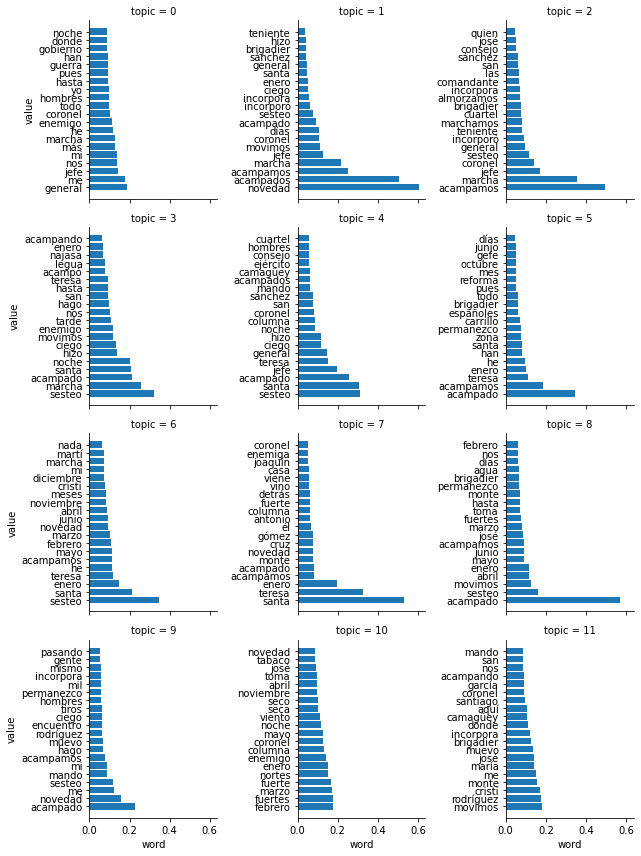

In [ ]:
# Graph the words in each of the LSI topics produced above

import seaborn as sns
from matplotlib import pyplot as plt

g = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
g.map(plt.barh, "word", "value")
g.savefig(savedir + "/LSIModel_Seaborn_" + str(n_topics) + "Output.png")

## Using LDA with Gensim

Now we'll use LDA.

In [ ]:
# Now preprocess the corpus again for an LDA topic model

from gensim.utils import simple_preprocess

texts = df.content.apply(simple_preprocess)

In [ ]:
from gensim import corpora

# Create a dictionary of words from our selected corpora, as we did with the LSI topic model

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=2000)
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
from gensim import models

# Run the LDA distribution and save its output

lda_model = models.LdaModel(corpus=corpus, num_topics=n_topics)
lda_model.save(savedir + "/LDAModel_" + str(n_topics) + "Output")

In [ ]:
# Print the topic's distribution statistics
lda_model.print_topics()

[(0,
  '0.023*"40" + 0.009*"34" + 0.009*"352" + 0.009*"345" + 0.008*"52" + 0.008*"283" + 0.008*"46" + 0.007*"372" + 0.007*"4" + 0.007*"294"'),
 (1,
  '0.016*"345" + 0.012*"372" + 0.010*"386" + 0.008*"9" + 0.007*"352" + 0.007*"40" + 0.006*"282" + 0.006*"61" + 0.006*"283" + 0.006*"566"'),
 (2,
  '0.021*"40" + 0.016*"345" + 0.015*"352" + 0.009*"386" + 0.009*"46" + 0.008*"4" + 0.006*"12" + 0.006*"331" + 0.006*"540" + 0.006*"282"'),
 (3,
  '0.018*"345" + 0.016*"40" + 0.010*"241" + 0.010*"282" + 0.009*"352" + 0.008*"386" + 0.008*"46" + 0.007*"551" + 0.006*"283" + 0.006*"312"'),
 (4,
  '0.030*"40" + 0.009*"46" + 0.009*"345" + 0.008*"372" + 0.008*"241" + 0.007*"12" + 0.007*"566" + 0.006*"9" + 0.006*"34" + 0.006*"352"'),
 (5,
  '0.024*"40" + 0.016*"46" + 0.012*"4" + 0.010*"345" + 0.008*"282" + 0.008*"539" + 0.007*"294" + 0.007*"34" + 0.007*"372" + 0.007*"386"'),
 (6,
  '0.017*"40" + 0.015*"345" + 0.008*"539" + 0.008*"352" + 0.007*"294" + 0.007*"283" + 0.007*"386" + 0.006*"384" + 0.006*"761" + 0

In [ ]:
#!pip install pyLDAvis

# Set up to run LDA visualization using the pyLDAvis gensim library

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
vis = gensimvis.prepare(lda_model, corpus, dictionary)

#import pyLDAvis
#import pyLDAvis.gensim

#pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(vis, savedir + "/LDAVis_" + str(n_topics) + "Output.html")
vis

# Et voila, easier-to-interact-with visualizations that use LDA topic modeling

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.010141  0.006031       1        1  31.929223
9      0.020480  0.003150       2        1  21.472809
5     -0.032332 -0.008995       3        1   8.072324
1      0.034785  0.026917       4        1   7.916668
8      0.008223 -0.013866       5        1   7.073965
6      0.015780 -0.026740       6        1   5.345871
11     0.026926 -0.003423       7        1   4.623621
2      0.005093 -0.005108       8        1   4.208127
4     -0.016143  0.020939       9        1   3.021954
3     -0.008799 -0.015133      10        1   2.590458
7     -0.015128  0.006974      11        1   1.948414
0     -0.028744  0.009253      12        1   1.796565, topic_info=        Term        Freq       Total Category  logprob  loglift
40   general  535.000000  535.000000  Default  30.0000  30.0000
345       me  458.000000  458.000000  Default  29.0000  29.0000
46      jefe  226.000000  226.000000  Default  28.0000  28.0000
352       mi  228.000000  228.000000  Default  27.0000  27.0000
386      nos  223.000000  223.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
70   órdenes    1.618520   59.168296  Topic12  -5.6971   0.4204
101      así    1.552011   58.498540  Topic12  -5.7390   0.3898
241  enemigo    1.919803  145.794173  Topic12  -5.5264  -0.3107
539     todo    1.888539  154.740961  Topic12  -5.5428  -0.3867
386      nos    1.938625  223.105761  Topic12  -5.5166  -0.7264

[860 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
77        1  0.170171  abandonado
77        2  0.510514  abandonado
1102      1  0.275386       abril
1102      2  0.225316       abril
1102      3  0.100140       abril
...     ...       ...         ...
872       3  0.057001      último
872       4  0.057001      último
872       5  0.057001      último
872       6  0.057001      último
872      11  0.057001      último

[3242 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 10, 6, 2, 9, 7, 12, 3, 5, 4, 8, 1])

In [ ]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')